Generate confusion matrices for the best performing models for each classification problem (species classification and gram-ness classification). The models to use are the best from the notebooks `Classification-Species.ipynb` and `Classification-Gramness.ipynb`.

In [1]:
import numpy as np

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns

from experiments.sklearn import Experiment, GramnessExperiment

%matplotlib inline

In [2]:
def generate_metrics(clf, X, y, target_type):
    target_type = target_type.lower()
    
    assert target_type in ['species', 'gramness']
    
    cv = StratifiedKFold(n_splits=3, random_state=42)
    y_pred = cross_val_predict(clf, X, y, cv=cv)

    print(classification_report(y, y_pred))

    labels = np.unique(y)
    cm = confusion_matrix(y, y_pred, labels)    

    ax = sns.heatmap(cm, annot=True, cmap='Blues')
    ax.set(xlabel='Predicted labels', 
           ylabel='True labels',
           title='Confusion Matrix of SVM Classification of %s' % target_type.capitalize())
    ax.xaxis.set_ticklabels(labels)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top') 
    ax.yaxis.set_ticklabels(labels)

    plt.tight_layout()    
    plt.savefig('data/svm_%s_confusion_matrix' % target_type);

In [3]:
e = Experiment('all')
e.svm_test('32ms');

******************
Running SVM tests.
******************
Fitting 60 folds for each of 220 candidates, totalling 13200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 786 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 10986 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 13200 out of 13200 | elapsed:    9.9s finished


Best grid search score was 0.59 with the following settings: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy: 0.59 (+/- 0.11)
PCA Accuracy: 0.59 (+/- 0.11)
Elapsed time: 00m 10s


              precision    recall  f1-score   support

          bc       0.80      1.00      0.89        12
          ec       0.00      0.00      0.00         5
          lm       0.00      0.00      0.00         3
          pa       0.33      0.67      0.44         6
          sa       0.89      1.00      0.94         8
          se       0.00      0.00      0.00         5

   micro avg       0.62      0.62      0.62        39
   macro avg       0.34      0.44      0.38        39
weighted avg       0.48      0.62      0.53        39



/home/anthony/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anthony/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anthony/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


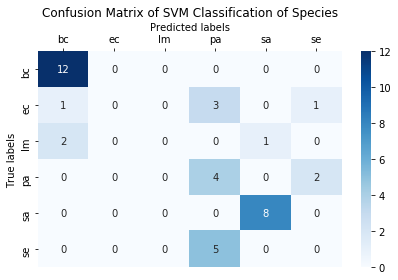

In [4]:
X = e.X['32ms']
y = e.y['32ms']

clf = SVC(C=1, gamma=0.01, kernel='rbf')

generate_metrics(clf, X, y, 'species')

In [5]:
ge = GramnessExperiment('log')
ge.svm_test('16ms');

******************
Running SVM tests.
******************
Fitting 60 folds for each of 220 candidates, totalling 13200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 7044 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 13200 out of 13200 | elapsed:   10.7s finished


Best grid search score was 0.98 with the following settings: {'C': 0.01, 'gamma': 1, 'kernel': 'linear'}
Accuracy: 0.98 (+/- 0.07)
PCA Accuracy: 0.98 (+/- 0.07)
Elapsed time: 00m 11s


              precision    recall  f1-score   support

    negative       1.00      0.94      0.97        18
    positive       0.96      1.00      0.98        23

   micro avg       0.98      0.98      0.98        41
   macro avg       0.98      0.97      0.98        41
weighted avg       0.98      0.98      0.98        41



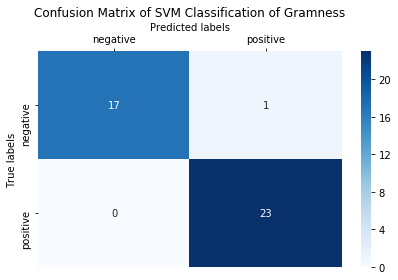

In [6]:
X = ge.X['16ms']
y = ge.y['16ms']

clf = SVC(C=0.01, gamma=1, kernel='linear')

generate_metrics(clf, X, y, 'gramness')